## **IMPORTAMOS LAS LIBRERIAS**

In [65]:
! pip install pyodbc 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc #importamos 
import os
import warnings

warnings.filterwarnings("ignore")


---

## **ETL**

### Primero realizaremos la extración de la información la cual se trae desde una base de datos cargada desde Kaggle
- Se agregan las carpegas que utilizaremos durante nuestro proceso de analisis
- Se cargan las tablas que se utilizaran durante 

In [67]:
# Descargamos los datos del KAGGLE
path = kagglehub.dataset_download("wyattowalsh/basketball")

# Ruta de la carpeta que contiene los archivos CSV
path = path.replace("\\", "/")  # Cambiar barras invertidas
carpeta = fr"{path}/csv"

# Lista de archivos específicos a usar
archivos_a_usar = ["game.csv", "inactive_players.csv", "play_by_play.csv", "team.csv", "common_player_info.csv"]

# Diccionario para almacenar los DataFrames con nombres clave
dataframes = {}

# Parámetros para optimización
chunksize = 10000  # Leer en fragmentos de 10,000 filas
columnas_necesarias = None  # Especifica columnas necesarias, si las conoces (lista de nombres)
dtypes = None  # Especifica tipos de datos, si los conoces (diccionario)

# Iterar sobre los archivos en la carpeta y filtrar según la lista
for archivo in os.listdir(carpeta):
    if archivo in archivos_a_usar:  # Verifica si el archivo está en la lista
        ruta_archivo = os.path.join(carpeta, archivo)
        try:
            # Variable temporal para almacenar los fragmentos del archivo
            fragmentos = []
            
            # Leer el archivo en fragmentos (chunks)
            for chunk in pd.read_csv(
                ruta_archivo, 
                chunksize=chunksize, 
                usecols=columnas_necesarias,  # Especificar columnas necesarias (si corresponde)
                dtype=dtypes  # Especificar tipos de datos para optimizar memoria (si corresponde)
            ):
                # Opcional: Procesar cada fragmento aquí antes de agregarlo
                fragmentos.append(chunk)

            # Combinar los fragmentos en un solo DataFrame para este archivo
            df = pd.concat(fragmentos, ignore_index=True)
            
            # Asignar al diccionario usando el nombre del archivo sin extensión como clave
            nombre_variable = os.path.splitext(archivo)[0]  # Quitar la extensión
            dataframes[nombre_variable] = df
            
            print(f"Archivo leído correctamente: {archivo}")
        except Exception as e:
            print(f"Error al leer el archivo {archivo}: {e}")

# Acceso individual a los DataFrames
# Tabla de games
games = dataframes.get("game")

# Tabla de inactivos
inactive_players = dataframes.get("inactive_players")

# Tabla de resumen general
game_detail = dataframes.get("play_by_play")

# Tabla de equipos
teams = dataframes.get("team")

#Informacion de jugadores
info_players = dataframes.get("common_player_info")



Archivo leído correctamente: common_player_info.csv
Archivo leído correctamente: game.csv
Archivo leído correctamente: inactive_players.csv
Archivo leído correctamente: play_by_play.csv
Archivo leído correctamente: team.csv


### GAMES

In [68]:
# Vemos el head, los primeros 5
games.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [69]:
# Obteción de informacion sobre la tabla con el tipo de dato de cada columna
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               65698 non-null  int64  
 1   team_id_home            65698 non-null  int64  
 2   team_abbreviation_home  65698 non-null  object 
 3   team_name_home          65698 non-null  object 
 4   game_id                 65698 non-null  int64  
 5   game_date               65698 non-null  object 
 6   matchup_home            65698 non-null  object 
 7   wl_home                 65696 non-null  object 
 8   min                     65698 non-null  int64  
 9   fgm_home                65685 non-null  float64
 10  fga_home                50251 non-null  float64
 11  fg_pct_home             50208 non-null  float64
 12  fg3m_home               52480 non-null  float64
 13  fg3a_home               47015 non-null  float64
 14  fg3_pct_home            46624 non-null

In [70]:
# Vemos las columnas que se representan
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [71]:
# Filtramos las columnas a utilizar
games = games[['game_date', 'game_id', 'team_id_home', 'wl_home', 'wl_away', 'team_id_away', 'pts_home', 'pts_away']]

# Observamos la información en una tabla sencilla
games.head()

,game_date,game_id,team_id_home,wl_home,wl_away,team_id_away,pts_home,pts_away
0,1946-11-01 00:00:00,24600001,1610610035,L,W,1610612752,66.0,68.0
1,1946-11-02 00:00:00,24600003,1610610034,W,L,1610610031,56.0,51.0
2,1946-11-02 00:00:00,24600002,1610610032,W,L,1610612738,59.0,53.0
3,1946-11-02 00:00:00,24600004,1610610025,W,L,1610612752,63.0,47.0
4,1946-11-02 00:00:00,24600005,1610610028,L,W,1610610036,33.0,50.0


In [73]:
# Colocamos el formato fecha y filtramos las fechas de interés
games['game_date'] = pd.to_datetime(games['game_date'])

# Filtrar por rango de años (2013 a 2023, inclusive)
games_table = games[(games['game_date'].dt.year >= 2013) & (games['game_date'].dt.year <= 2023)]

# Creamos columna año
games_table['year'] = games_table['game_date'].dt.year

# Observamos la información de los datos
games_table.sample(8)

,game_date,game_id,team_id_home,wl_home,wl_away,team_id_away,pts_home,pts_away,year
61872,2021-01-13,22000169,1610612750,L,W,1610612763,107.0,118.0,2021
64116,2022-04-05,22101178,1610612754,L,W,1610612755,122.0,131.0,2022
58978,2018-03-28,21701122,1610612756,L,W,1610612746,99.0,111.0,2018
56229,2016-04-11,21501211,1610612756,L,W,1610612758,101.0,105.0,2016
61279,2020-01-29,21900712,1610612757,W,L,1610612745,125.0,112.0,2020
53658,2014-11-05,21400062,1610612749,L,W,1610612741,86.0,95.0,2014
63363,2021-12-17,22100433,1610612753,L,W,1610612748,105.0,115.0,2021
56848,2016-12-17,21600399,1610612760,W,L,1610612756,114.0,101.0,2016


In [74]:
# Observamos la información
games_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13627 entries, 52071 to 65697
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   game_date     13627 non-null  datetime64[ns]
 1   game_id       13627 non-null  int64         
 2   team_id_home  13627 non-null  int64         
 3   wl_home       13627 non-null  object        
 4   wl_away       13627 non-null  object        
 5   team_id_away  13627 non-null  int64         
 6   pts_home      13627 non-null  float64       
 7   pts_away      13627 non-null  float64       
 8   year          13627 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 1011.4+ KB


In [75]:
games_table.to_csv("games_table", index=False)

## TEAMS

In [76]:
# Observamos
teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949.0
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946.0
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970.0
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002.0
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966.0


In [77]:
# Filtramos columnas
teams = teams[['id', 'city', 'nickname']]
teams_table = teams

teams_table.to_csv("teams_table", index=False)



In [78]:
teams_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        30 non-null     int64 
 1   city      30 non-null     object
 2   nickname  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes


In [100]:
#Unimos tabla GAMES y TEAMS con equipos de CASA(local) mediante un JOIN
home_games =  pd.merge(games_table, teams, left_on='team_id_home', right_on='id', how='inner')

#Renombramos columnas
home_games = home_games.rename(columns={
   'city': 'city_home',
   'nickname': 'nickname_home'
})

home_games.head()

,game_date,game_id,team_id_home,wl_home,wl_away,team_id_away,pts_home,pts_away,year,id,city_home,nickname_home
0,2013-04-20,41200161,1610612743,W,L,1610612744,97.0,95.0,2013,1610612743,Denver,Nuggets
1,2013-04-20,41200131,1610612751,W,L,1610612741,106.0,89.0,2013,1610612751,Brooklyn,Nets
2,2013-04-20,41200111,1610612752,W,L,1610612738,85.0,78.0,2013,1610612752,New York,Knicks
3,2013-04-20,41200171,1610612746,W,L,1610612763,112.0,91.0,2013,1610612746,Los Angeles,Clippers
4,2013-04-21,41200121,1610612754,W,L,1610612737,107.0,90.0,2013,1610612754,Indiana,Pacers


In [101]:
# Combinamos las tablas de juegos de CASA y de VISITANTES
both_games = pd.merge(home_games, teams, left_on='team_id_away', right_on='id', how='inner')

# Renombramos columnas
both_games = both_games.rename(columns={
    'city': 'city_away',
    'nickname': 'nickname_away'
})

# Eliminamos columnas
both_games = both_games.drop(columns=[
    'team_id_home', 'team_id_away', 'id_x', 'id_y'
])

# Observamos
both_games.head()

,game_date,game_id,wl_home,wl_away,pts_home,pts_away,year,city_home,nickname_home,city_away,nickname_away
0,2013-04-20,41200161,W,L,97.0,95.0,2013,Denver,Nuggets,Golden State,Warriors
1,2013-04-20,41200131,W,L,106.0,89.0,2013,Brooklyn,Nets,Chicago,Bulls
2,2013-04-20,41200111,W,L,85.0,78.0,2013,New York,Knicks,Boston,Celtics
3,2013-04-20,41200171,W,L,112.0,91.0,2013,Los Angeles,Clippers,Memphis,Grizzlies
4,2013-04-21,41200121,W,L,107.0,90.0,2013,Indiana,Pacers,Atlanta,Hawks


In [108]:
# both_games.duplicated().sum()
#both_games[both_games["game_id"].str.contains("41200161",case =False, na =False)]
both_games[both_games["game_id"] == 41200161]

,game_date,game_id,wl_home,wl_away,pts_home,pts_away,year,city_home,nickname_home,city_away,nickname_away
0,2013-04-20,41200161,W,L,97.0,95.0,2013,Denver,Nuggets,Golden State,Warriors


## Play by play

In [82]:
game_detail.head()

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,...,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
0,29600012,0,12,0,1,14:43 PM,12:00,NaN,Start of 1st Period (14:43 PM EST),NaN,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
1,29600012,2,10,0,1,14:50 PM,12:00,Jump Ball O'Neal vs. Kleine: Tip to Cassell,NaN,NaN,...,Suns,PHX,5.0,208,Sam Cassell,1.610613e+09,Phoenix,Suns,PHX,0
2,29600012,3,2,1,1,14:51 PM,11:45,NaN,NaN,MISS Cassell 15' Jump Shot,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
3,29600012,4,4,0,1,14:51 PM,11:43,O'Neal REBOUND (Off:0 Def:1),NaN,NaN,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
4,29600012,5,2,1,1,14:51 PM,11:29,MISS Ceballos 26' 3PT Jump Shot,NaN,NaN,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0


In [83]:
#Seleccionamos las columnas con las que trabajaremos
game_detail = game_detail[['game_id', 'person1type', 'player1_name']]

#Se suman los valores duplicados
game_detail.duplicated().sum()

#Se eliminan valores duplicados
game_detail.drop_duplicates(inplace=True)

#Se eliminan valores nulos o vacios
game_detail.dropna(inplace=True)

#Se extrae informacion que tenga valores mayores a cero(0) en caso que aparezcan el el DF
game_detail = game_detail[game_detail["person1type"] > 0.0]

game_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610035 entries, 1 to 13592369
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   game_id       610035 non-null  int64  
 1   person1type   610035 non-null  float64
 2   player1_name  610035 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 18.6+ MB


tabla descodificada

In [84]:
# games_info = pd.merge(games_1, game_detail,  left_on='game_id', right_on='game_id', how='inner')
# games_info.head()

# player_pts = games_info.groupby(['year', 'player1_name'])['person1type'].mean().reset_index().sort_values('year')
# player_pts.head(10)

# player_pts.info()

# player_pts[player_pts['year'] == 2022].sort_values(by='person1type', ascending=False).head(10)



In [85]:
game_detail_table = game_detail
game_detail_table.to_csv("game_detail_table", index=False)


## Jugadores Inactivos

In [86]:
inactive_players.head()

,game_id,player_id,first_name,last_name,jersey_num,team_id,team_city,team_name,team_abbreviation
0,29600034,184,Bobby,Phills,14.0,1610612739,Cleveland,Cavaliers,CLE
1,29600034,781,Will,Perdue,41.0,1610612759,San Antonio,Spurs,SAS
2,29600132,120,Steven,Smith,8.0,1610612737,Atlanta,Hawks,ATL
3,29600203,698,Eddie,Johnson,8.0,1610612754,Indiana,Pacers,IND
4,29600213,32,Clifford,Rozier,44.0,1610612753,Orlando,Magic,ORL


In [87]:
inactive_players['inactive_player_name'] = inactive_players['first_name'].astype(str) + ' ' + inactive_players['last_name'].astype(str)

inactive_players = inactive_players[['game_id', 'inactive_player_name']]

inactive_players_sin_duplicados = inactive_players.drop_duplicates(subset='inactive_player_name', keep='first')

inactive_players_sin_duplicados.reset_index(drop=True, inplace=True)

In [88]:
inactive_players.head()

,game_id,inactive_player_name
0,29600034,Bobby Phills
1,29600034,Will Perdue
2,29600132,Steven Smith
3,29600203,Eddie Johnson
4,29600213,Clifford Rozier


In [89]:
inactive_players_table = inactive_players
inactive_players_table.to_csv("inactive_players_table", index=False)

In [90]:
inactive_players_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110191 entries, 0 to 110190
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   game_id               110191 non-null  int64 
 1   inactive_player_name  110191 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


---


## Información común de los jugadores

In [91]:
info_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         4171 non-null   int64  
 1   first_name                        4171 non-null   object 
 2   last_name                         4171 non-null   object 
 3   display_first_last                4171 non-null   object 
 4   display_last_comma_first          4171 non-null   object 
 5   display_fi_last                   4171 non-null   object 
 6   player_slug                       4171 non-null   object 
 7   birthdate                         4171 non-null   object 
 8   school                            4156 non-null   object 
 9   country                           4170 non-null   object 
 10  last_affiliation                  4171 non-null   object 
 11  height                            4075 non-null   object 
 12  weight

In [92]:
info_players.head()

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


In [93]:
info_players = info_players[['team_id', 'team_name', 'team_code', 'display_last_comma_first', 'birthdate', 'school', 'country', 'season_exp', 'position', 'draft_year', 'from_year', 'to_year']]

#Se suman los valores duplicados
info_players.duplicated().sum()

#Se eliminan valores duplicados
info_players.drop_duplicates(inplace=True)

#Se eliminan valores nulos o vacios
info_players.dropna(inplace=True)



info_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3449 entries, 0 to 4170
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_id                   3449 non-null   int64  
 1   team_name                 3449 non-null   object 
 2   team_code                 3449 non-null   object 
 3   display_last_comma_first  3449 non-null   object 
 4   birthdate                 3449 non-null   object 
 5   school                    3449 non-null   object 
 6   country                   3449 non-null   object 
 7   season_exp                3449 non-null   float64
 8   position                  3449 non-null   object 
 9   draft_year                3449 non-null   object 
 10  from_year                 3449 non-null   float64
 11  to_year                   3449 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 350.3+ KB


In [94]:
info_players.sample(10)

,team_id,team_name,team_code,display_last_comma_first,birthdate,school,country,season_exp,position,draft_year,from_year,to_year
3707,1610612743,Nuggets,nuggets,"Toupane, Axel",1992-07-23 00:00:00,Strasbourg IG,France,4.0,Guard-Forward,Undrafted,2015.0,2020.0
3214,1610612757,Trail Blazers,blazers,"Roy, Brandon",1984-07-23 00:00:00,Washington,USA,6.0,Guard,2006,2006.0,2012.0
1113,1610612755,Nationals,sixers,"Farley, Dick",1932-04-13 00:00:00,Indiana,USA,3.0,Guard,1954,1954.0,1958.0
2014,1610612763,Grizzlies,grizzlies,"Kennard, Luke",1996-06-24 00:00:00,Duke,USA,6.0,Guard,2017,2017.0,2023.0
3359,1610612746,Braves,clippers,"Shumate, John",1952-04-06 00:00:00,Notre Dame,USA,5.0,Forward,1974,1975.0,1980.0
3069,1610612755,76ers,sixers,"Raymond, Craig",1945-04-05 00:00:00,Brigham Young,USA,1.0,Center,1967,1968.0,1968.0
2372,1610612747,Lakers,lakers,"Martin, Slater",1925-10-22 00:00:00,Texas-Austin,USA,11.0,Guard,Undrafted,1949.0,1959.0
306,1610612747,Lakers,lakers,"Black, Tarik",1991-11-22 00:00:00,Kansas,USA,5.0,Forward-Center,Undrafted,2014.0,2017.0
2060,1610612752,Knicks,knicks,"Kistler, Doug",1938-03-21 00:00:00,Duke,USA,1.0,Forward,1961,1961.0,1961.0
2618,1610612751,Nets,nets,"Morris, Chris",1966-01-20 00:00:00,Auburn,USA,11.0,Forward,1988,1988.0,1998.0


In [95]:

info_players.to_csv("info_players", index=False)

---

## EDA (Análisis exploratorio de datos)

Preparacion de datos


In [96]:


games['total_points'] = games['pts_home'] + games['pts_away']
games.head()

games.nlargest(n=5, columns='total_points')

games.nsmallest(n=5, columns='total_points')

,game_date,game_id,team_id_home,wl_home,wl_away,team_id_away,pts_home,pts_away,total_points
1596,1950-11-22,25000061,1610612747,L,W,1610612765,18.0,19.0,37.0
46430,2007-10-19,10700072,1610612738,NaN,NaN,1610612751,36.0,33.0,69.0
4,1946-11-02,24600005,1610610028,L,W,1610610036,33.0,50.0,83.0
162,1947-01-16,24600163,1610612738,W,L,1610610036,47.0,38.0,85.0
63,1946-11-30,24600065,1610610036,W,L,1610610031,49.0,40.0,89.0


In [97]:
total_points = games['wl_home'].value_counts()
total_points

wl_home
W    40649
L    25047
Name: count, dtype: int64

Cantidad de puntos por equipo cuando jueguen en casa o de visita

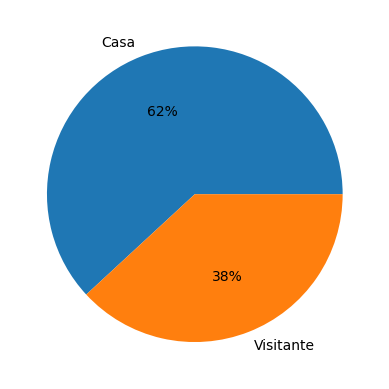

In [35]:
plt.pie(total_points.values, labels=['Casa', 'Visitante'], autopct='%.0f%%')
plt.show()

Graficacion de rendimiento 

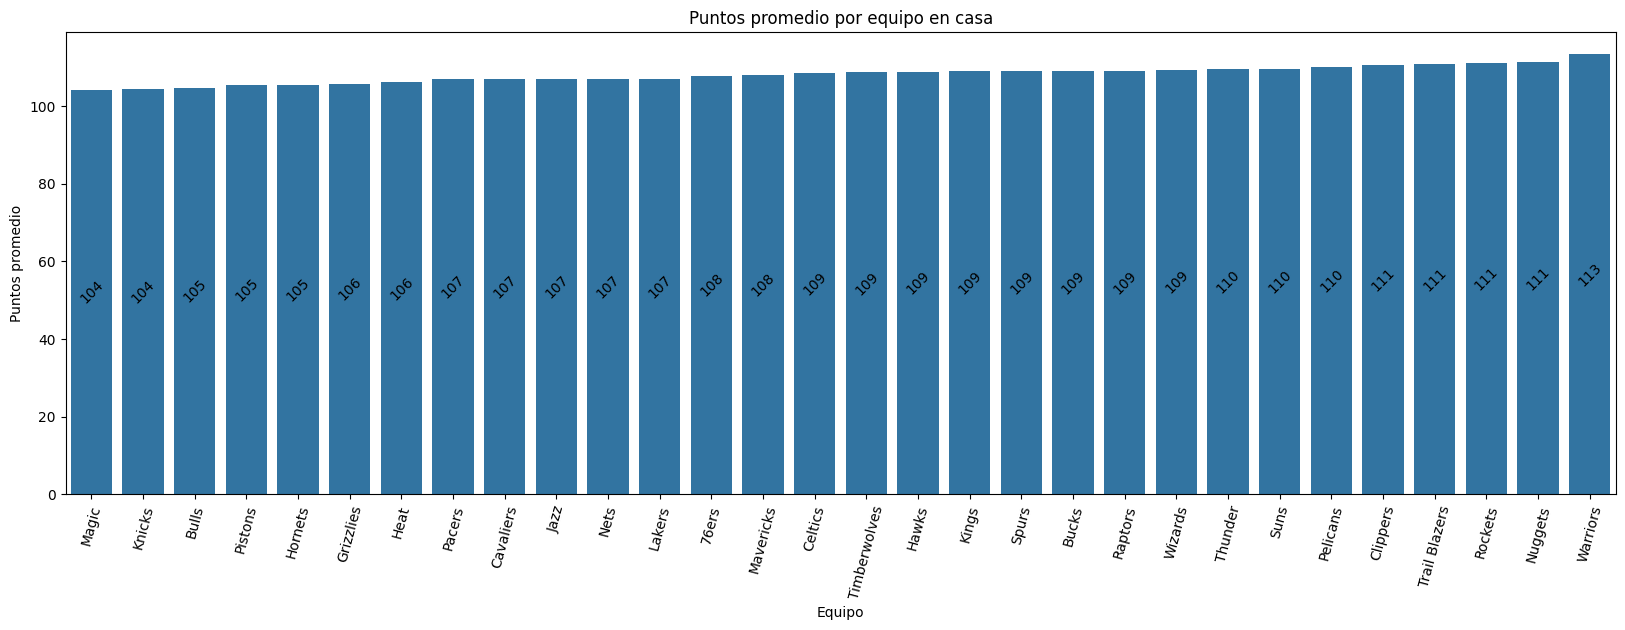

Index(['game_date', 'game_id', 'wl_home', 'wl_away', 'pts_home', 'pts_away',
       'year', 'city_home', 'nickname_home', 'city_away', 'nickname_away'],
      dtype='object')


In [124]:
games = both_games[both_games['wl_home'] == 1]

# Calcular los puntos promedio en casa por equipo.
result = both_games[['nickname_home','pts_home']].groupby('nickname_home').mean().reset_index().sort_values('pts_home')
# Crear el gráfico de barras.
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=both_games, x='nickname_home', y='pts_home', order=result['nickname_home'], errorbar=None)

# Agregar etiquetas a las barras.
if ax.containers:  # Asegurarse de que las barras existan.
    ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)

# Ajustar detalles del gráfico.
plt.xticks(rotation=75)  # Rotar etiquetas si es necesario.
plt.title("Puntos promedio por equipo en casa")
plt.ylabel("Puntos promedio")
plt.xlabel("Equipo")
plt.show()

print(both_games.columns)

Histograma del promedio de puntaje en los encuentros

Text(0.5, 1.0, 'Puntos promedio por encuentro')

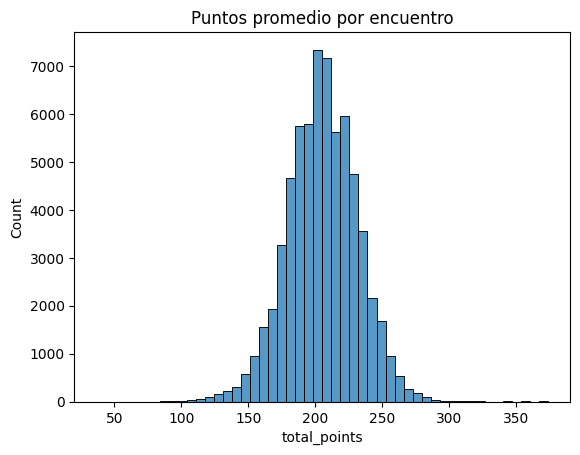

In [41]:
sns.histplot(data=games, x='total_points', bins=50)
plt.title("Puntos promedio por encuentro")

Rango de puntos totales con variaciones en juegos menores

Text(0.5, 1.0, 'Rango de puntos totales')

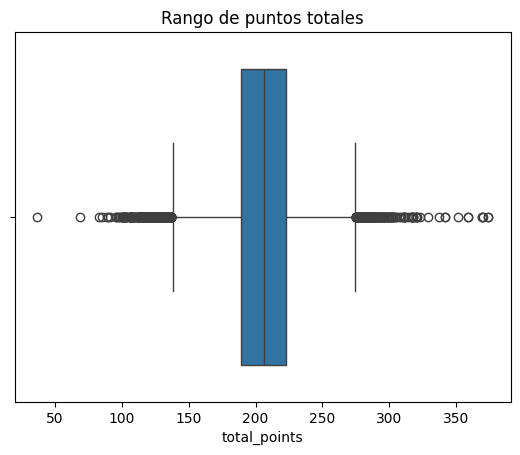

In [42]:
sns.boxplot(x=games['total_points'])
plt.title("Rango de puntos totales")

Graciacion de partidos ganados por equipo en casa 

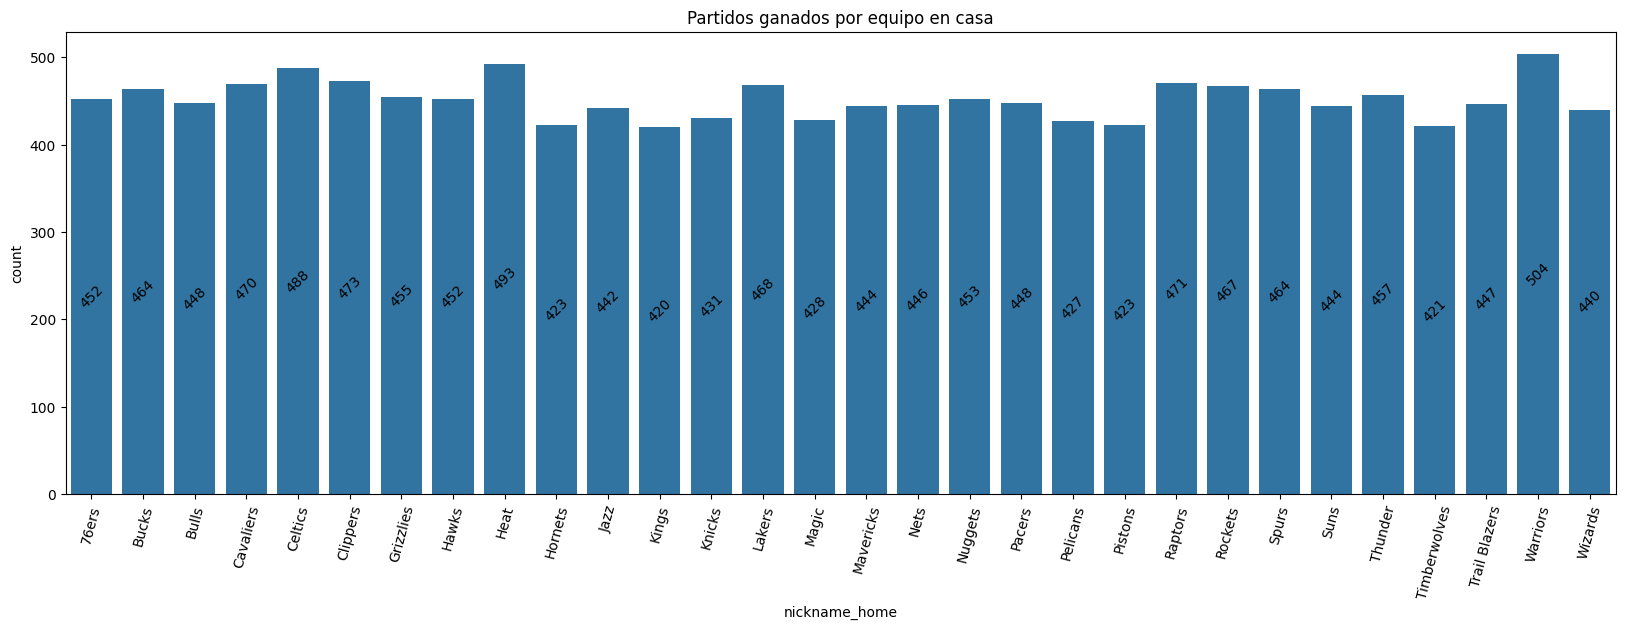

In [142]:
plt.figure(figsize=(20,6))
result = both_games['nickname_home'].sort_values().reset_index()

ax = sns.countplot(x='nickname_home', data=result)
ax.bar_label(ax.containers[0], label_type='center', rotation=45)
plt.xticks(rotation=75)
plt.title("Partidos ganados por equipo en casa")
plt.show()

In [153]:
result = both_games['nickname_home'].sort_values().reset_index()
result

,index,nickname_home
0,6781,76ers
1,2794,76ers
2,2806,76ers
3,11566,76ers
4,11553,76ers
...,...,...
13558,4171,Wizards
13559,13138,Wizards
13560,658,Wizards
13561,11590,Wizards


Partidos de Casa vs Visita comparacion en puntos

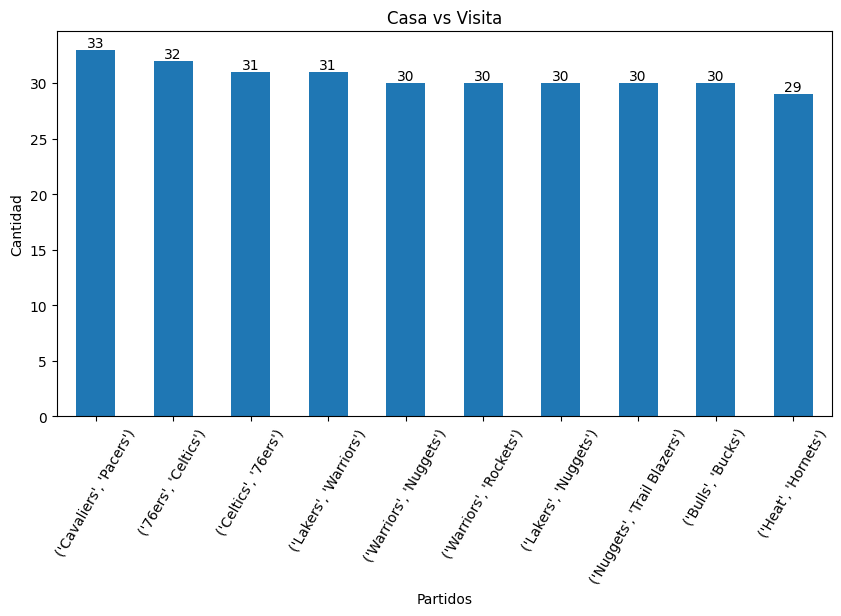

In [159]:
plt.figure(figsize=(20,6))
x = both_games[['nickname_home', 'nickname_away']].value_counts()

ax = x[:10].plot(kind="bar", figsize=[10, 5])
ax.set_title('Casa vs Visita')
ax.set_xlabel('Partidos')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(x.index[:10], rotation = 60)
#plt.title("Partidos ganados en casa por VS de equipos")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.show()



---

Los jugadores que tuvieron mejor puntuacion en el 2022

Agregacion de Tabla de Jugadores inactivos por encuentros

# Conexión con Base de SQL

In [47]:
# import pyodbc #importamos 

# # Parámetros de conexión
# server = "DESKTOP-UTQDVSQ\SQLEXPRESS"  # Nombre del servidor seleccionar la base de datos por el equipo
# database = "DATOFINALNBAcsv"            # Reemplaza con el nombre de tu base de datos

# # Establecemos la conexión
# try:
#     # Intentamos conectar
#     conexion = pyodbc.connect(
#         f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"
#     )
#     print("Conexión exitosa")
    
#     # Aquí puedes añadir más operaciones como ejecutar consultas SQL
#     cursor = conexion.cursor()
#     cursor.execute("SELECT TOP 10 * FROM dbo.DATOFINALNBA ")  # Reemplaza 'TuTabla' por el nombre de una tabla existente
#     for row in cursor:
#         print(row)

# except pyodbc.Error as e:
#     # Manejo de errores
#     print("Error en la conexión:", e)

In [ ]:
import pyodbc  # Importamos la librería

# Parámetros de conexión
server = "DESKTOP-2PTA5VC\SQLEXPRESS"  # Nombre del servidor según al servidor que se ejecuta en el local
database = "DATOSFINALESNBA2023"            # Nombre de la base de datos

# Lista de tablas a consultar
tablas = ["game_detail_table", "games_table", "inactive_players_table", "teams_table"]

# Establecemos la conexión
try:
    # Intentamos conectar
    conexion = pyodbc.connect(
        f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"
    )
    print("Conexión exitosa")

    # Cursor para ejecutar consultas
    cursor = conexion.cursor()

    # Iterar sobre las tablas
    for tabla in tablas:
        print(f"\nConsultando datos de la tabla: {tabla}")
        query = f"SELECT TOP 10 * FROM dbo.{tabla}"  # Consulta para cada tabla
        cursor.execute(query)
        
        # Imprimir resultados
        for row in cursor:
            print(row)

except pyodbc.Error as e:
    # Manejo de errores
    print("Error en la conexión:", e)

#En caso de no querer manipular los archivos se debe cerrar la conexión con la DB

#finally:
    # Cerrar conexión
#    if 'conexion' in locals():
#        conexion.close()
#        print("\nConexión cerrada")


Conexión exitosa

Consultando datos de la tabla: game_detail_table
('29600012', '4.0', "Shaquille O'Neal")
('29600012', '5.0', 'Sam Cassell')
('29600012', '4.0', 'Cedric Ceballos')
('29600012', '4.0', 'Nick Van Exel')
('29600012', '5.0', 'Robert Horry')
('29600012', '5.0', 'Joe Kleine')
('29600012', '5.0', 'Wesley Person')
('29600012', '4.0', 'Eddie Jones')
('29600012', '4.0', 'Elden Campbell')
('29600012', '4.0', 'Derek Fisher')

Consultando datos de la tabla: games_table
('2013-04-20', '41200161', '1610612743', 'W', 'L', '1610612744', '97.0', '95.0', '2013')
('2013-04-20', '41200131', '1610612751', 'W', 'L', '1610612741', '106.0', '89.0', '2013')
('2013-04-20', '41200111', '1610612752', 'W', 'L', '1610612738', '85.0', '78.0', '2013')
('2013-04-20', '41200171', '1610612746', 'W', 'L', '1610612763', '112.0', '91.0', '2013')
('2013-04-21', '41200121', '1610612754', 'W', 'L', '1610612737', '107.0', '90.0', '2013')
('2013-04-21', '41200141', '1610612760', 'W', 'L', '1610612745', '120.0', 